### Street and price of squaremeter

## H0
Street and price of squaremeter are independent

## H1
Street and price of squaremeter are dependent

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [3]:
data = pd.read_csv('house_prices_fixed.csv',decimal=',')

In [4]:
data['price_category'] = list(map(lambda x: 'expensive' if x > 83405 else 'cheap',data['price_per_squaremeter']))

In [6]:
data.head(10)

,address,area,date,demanded_price,final_price,monthly_fee,operating_cost,price_per_squaremeter,room_number,title,url,year_of_construction,price_category
0,Luxgatan 7,30.0,13/01/21,2350000,2550000,1733,6096.0,85000,1 rum,Luxgatan 7 - Sald - Lilla Essingen \\\\ Kungs...,https://www.hemnet.se/salda/lagenhet-1rum-lill...,1937,expensive
1,"Primusgatan 108, 6/6 tr",101.0,10/01/21,11400000,11400000,5887,5540.0,112871,4 rum,"Primusgatan 108, 6/6 tr - Sald - Kungsholmen ...",https://www.hemnet.se/salda/lagenhet-4rum-kung...,1935,expensive
2,"Stralgatan 47, 3 tr",31.0,08/01/21,2595000,2875000,2471,3200.0,92742,2 rum,"Stralgatan 47, 3 tr - Sald - Lilla Essingen ...",https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,expensive
3,Disponentgatan 1,46.0,08/01/21,3550000,3550000,3003,12979.0,77174,"2,5 rum","Disponentgatan 1 - Sald - Lilla Essingen, STO...","https://www.hemnet.se/salda/lagenhet-2,5rum-li...",1935,cheap
4,Essinge Brogata 12,34.5,08/01/21,2495000,2900000,2162,4200.0,84058,2 rum,Essinge Brogata 12 - Sald - Kungsholmen - Lil...,https://www.hemnet.se/salda/lagenhet-2rum-kung...,1934,expensive
5,"Essinge Brogata 39, 2 tr",23.0,14/12/20,1895000,2205000,1787,3600.0,95870,1 rum,"Essinge Brogata 39, 2 tr - Sald - Lilla Essi...",https://www.hemnet.se/salda/lagenhet-1rum-lill...,1938,expensive
6,Stralgatan 47,40.0,11/12/20,2595000,2850000,2957,4860.0,71250,2 rum,Stralgatan 47 - Sald - Lilla Essingen \\\\ Ku...,https://www.hemnet.se/salda/lagenhet-2rum-lill...,1939,cheap
7,"Patentgatan 1, 3tr",69.0,04/12/20,5995000,6400000,3778,7200.0,92754,3 rum,"Patentgatan 1, 3tr - Sald - Lilla Essingen, S...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2006,expensive
8,"Primusgatan 82, 6tr",84.5,03/12/20,8495000,8495000,4828,7800.0,100533,3 rum,"Primusgatan 82, 6tr - Sald - Lilla Essingen, ...",https://www.hemnet.se/salda/lagenhet-3rum-lill...,2004,expensive
9,"Primusgatan 81, van 4",96.0,01/12/20,8495000,9250000,4793,6860.0,96354,4 rum,"Primusgatan 81, van 4 - Sald - Lilla Essingen...",https://www.hemnet.se/salda/lagenhet-4rum-lill...,2004,expensive


In [13]:
data['street'] = list(map(lambda x: x.split()[0],data['address']))

In [14]:
data['street'] = list(map(lambda x: 'Essinge Brogata' if x == 'Essinge' else x,data['street']))

In [15]:
data['street']

0             Luxgatan
1          Primusgatan
2           Stralgatan
3       Disponentgatan
4      Essinge Brogata
            ...       
231        Primusgatan
232           Luxgatan
233        Primusgatan
234         Stralgatan
235    Essinge Brogata
Name: street, Length: 236, dtype: object

In [16]:
data_crosstab = pd.crosstab(data['street'],  data['price_category'], margins = False)

In [17]:
data_crosstab

price_category,cheap,expensive
street,,
Disponentgatan,7,5
Essinge Brogata,41,24
Luxgatan,15,17
Patentgatan,1,2
Primusgatan,37,29
Stralgatan,32,26


In [18]:
contigency_pct = pd.crosstab(data['street'],  data['price_category'], normalize='index')

In [19]:
contigency_pct

price_category,cheap,expensive
street,,
Disponentgatan,0.583333,0.416667
Essinge Brogata,0.630769,0.369231
Luxgatan,0.468750,0.531250
Patentgatan,0.333333,0.666667
Primusgatan,0.560606,0.439394
Stralgatan,0.551724,0.448276


<AxesSubplot:xlabel='price_category', ylabel='street'>

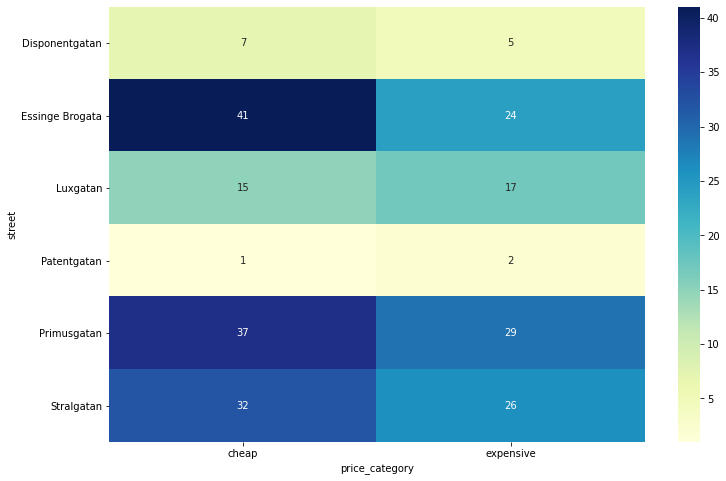

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(data_crosstab, annot=True, cmap="YlGnBu")

In [21]:
stat, p, dof, expected = chi2_contingency(data_crosstab)

In [22]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')


Independent (fail to reject H0)


In [23]:
p

0.6900944260969768